In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path_to_your_dir = 'drive/My Drive/PlanetaFrontPhotos/'

In [0]:
import os
import random
import imageio
# import skimage
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import ModelCheckpoint
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import cv2

%matplotlib inline

Using TensorFlow backend.


In [0]:
df_x_train = np.load(path_to_your_dir + 'df_x_vip_train10.npy')
df_y_train = np.load(path_to_your_dir + 'df_y_vip_train10.npy')

df_x_test = np.load(path_to_your_dir + 'df_x_vip_test10.npy')
df_y_test = np.load(path_to_your_dir + 'df_y_vip_test10.npy')

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(np.array(df_x), np.array(df_y), test_size=0.3, random_state=42, stratify=df_y)


X_train , X_test, y_train, y_test = df_x_train, df_x_test, df_y_train, df_y_test

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
X_train.shape

(3616, 86, 76, 3)

In [0]:
X_test.shape

(270, 86, 76, 3)

In [0]:
batch_size = 32
epochs = 25
img_rows, img_cols = 86, 76
input_shape = (img_rows, img_cols, 3)
kernel_size = (5,5)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(10, kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(30, kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 82, 72, 10)        760       
_________________________________________________________________
batch_normalization_1 (Batch (None, 82, 72, 10)        40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 36, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 32, 20)        5020      
_________________________________________________________________
batch_normalization_2 (Batch (None, 37, 32, 20)        80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 16, 20)        0         
_________________________________________________________________
conv

In [0]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])


In [0]:
# filepath = path_to_your_dir + "best.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
#           callbacks=callbacks_list,
          validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 3616 samples, validate on 270 samples
Epoch 1/25
3616/3616 [==============================] - 6s 2ms/step - loss: 0.0587 - acc: 0.9770 - val_loss: 0.4603 - val_acc: 0.9111
Epoch 2/25
3616/3616 [==============================] - 3s 715us/step - loss: 4.9990e-04 - acc: 1.0000 - val_loss: 0.6597 - val_acc: 0.8741
Epoch 3/25
3616/3616 [==============================] - 3s 714us/step - loss: 1.4319e-04 - acc: 1.0000 - val_loss: 0.6719 - val_acc: 0.8815
Epoch 4/25
3616/3616 [==============================] - 3s 698us/step - loss: 8.1754e-05 - acc: 1.0000 - val_loss: 0.7112 - val_acc: 0.8815
Epoch 5/25
3616/3616 [==============================] - 3s 701us/step - loss: 4.8449e-05 - acc: 1.0000 - val_loss: 0.7174 - val_acc: 0.8815
Epoch 6/25
3616/3616 [==============================] - 2s 687us/step - loss: 3.5200e-05 - acc: 1.0000 - val_loss: 0.7311 - val_acc: 0.8815
Epoch 7/25
3616/3616 [==============================] - 3s 692us/step -

In [0]:
model.save(path_to_your_dir + "best_vip.h5")

In [0]:
# from keras.models import load_model
# model = load_model(path_to_your_dir + 'model_clear_df.hdf5')


df = pd.DataFrame(model.predict_classes(X_test))



In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(y_test, df.values)

0.9959677419354839

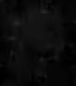

0


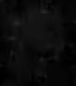

0


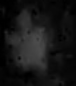

0


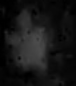

0


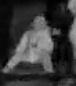

1


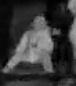

1


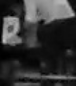

1


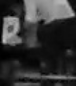

1


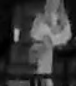

1


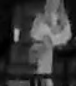

1


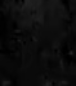

0


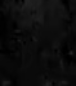

0


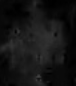

0


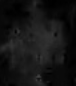

0


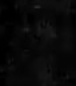

0


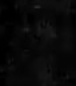

0


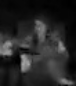

1


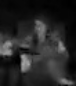

1


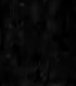

0


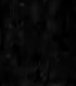

0


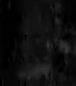

0


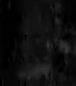

0


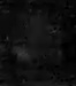

0


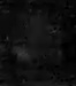

0


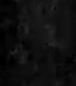

0


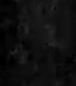

0


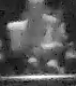

1


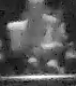

1


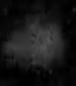

0


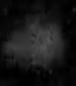

0


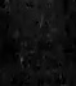

0


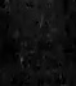

0


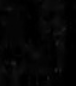

0


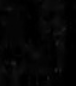

0


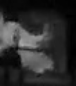

1


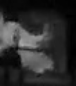

1


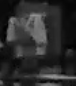

1


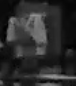

1


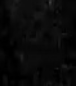

0


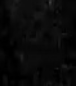

0


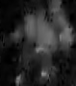

0


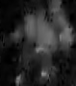

0


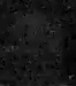

0


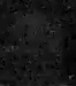

0


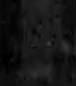

0


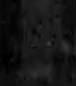

0


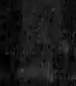

0


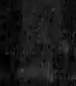

0


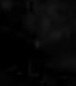

0


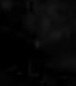

0


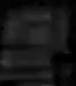

0


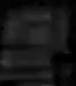

0


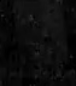

0


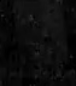

0


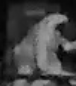

1


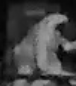

1


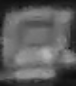

0


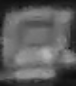

0


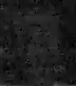

0


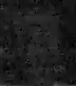

0


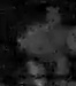

0


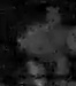

0


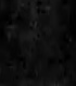

0


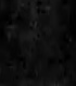

0


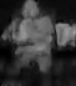

1


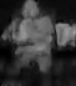

1


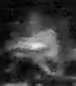

1


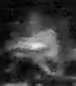

1


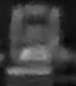

0


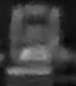

0


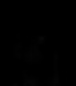

0


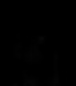

0


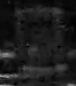

0


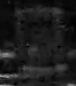

0


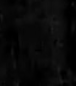

0


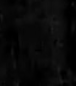

0


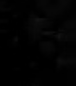

0


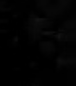

0


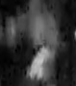

0


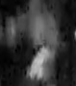

0


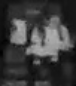

1


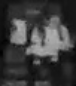

1


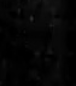

0


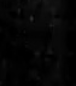

0


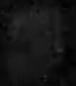

0


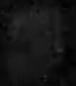

0


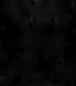

0


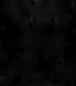

0


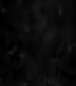

0


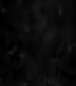

0


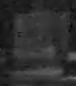

0


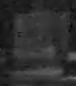

0


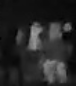

0


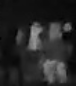

0


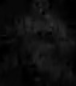

0


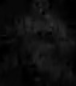

0


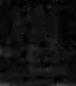

0


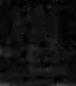

0


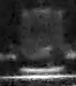

1


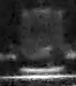

1


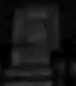

0


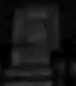

0


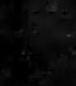

0


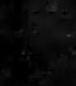

0


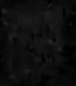

0


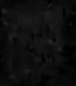

0


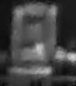

0


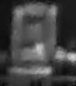

0


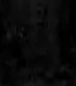

0


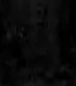

0


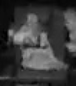

1


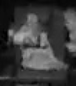

1


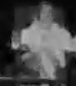

1


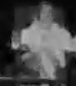

1


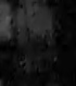

0


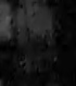

0


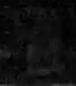

0


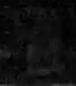

0


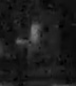

0


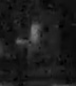

0


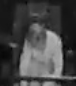

1


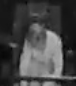

1


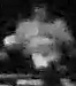

1


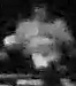

1


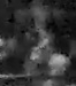

1


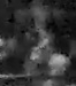

1


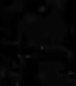

0


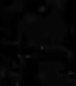

0


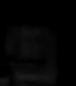

0


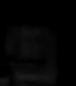

0


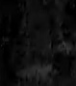

0


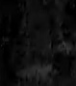

0


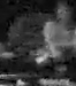

1


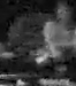

1


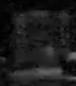

0


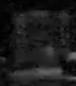

0


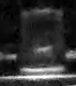

1


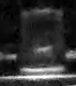

1


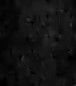

0


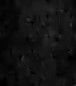

0


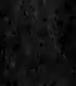

0


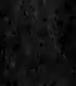

0


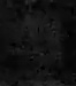

0


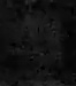

0


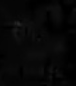

0


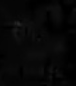

0


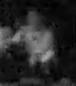

1


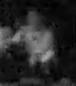

1


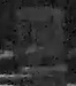

0


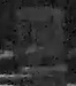

0


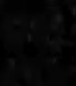

0


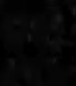

0


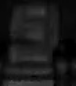

0


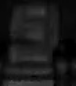

0


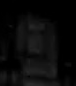

0


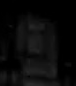

0


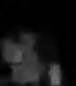

0


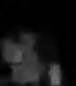

0


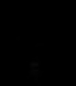

0


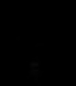

0


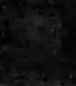

0


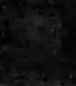

0


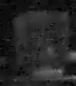

0


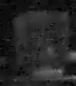

0


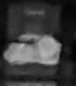

1


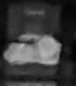

1


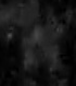

0


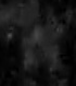

0


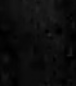

0


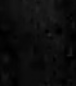

0


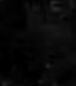

0


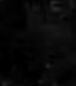

0


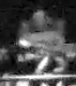

1


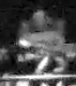

1


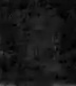

0


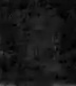

0


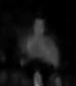

0


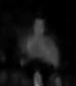

0


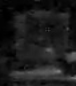

0


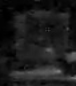

0


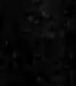

0


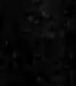

0


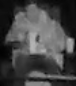

1


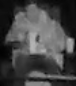

1


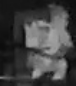

1


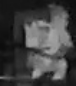

1


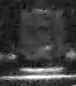

1


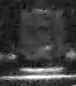

1


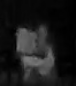

0


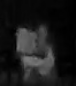

0


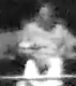

1


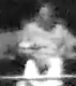

1


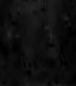

0


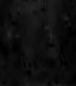

0


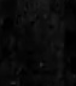

0


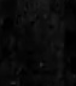

0


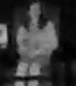

1


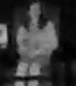

1


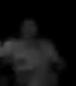

0


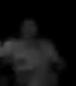

0


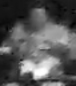

1


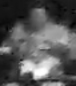

1


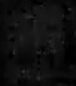

0


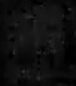

0


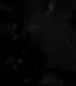

0


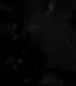

0


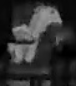

1


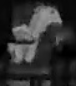

1


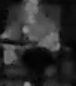

1


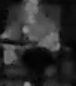

1


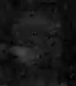

0


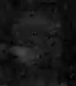

0


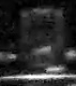

1


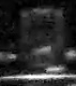

1


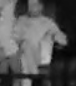

1


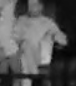

1


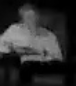

1


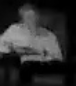

1


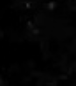

0


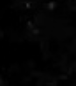

0


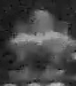

0


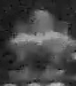

0


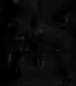

0


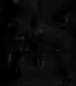

0


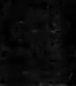

0


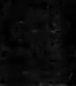

0


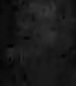

0


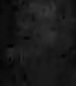

0


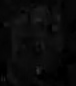

0


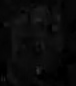

0


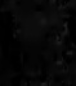

0


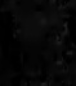

0


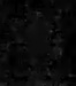

0


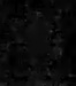

0


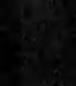

0


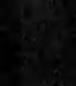

0


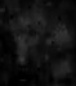

0


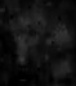

0


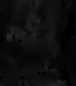

0


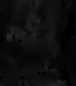

0


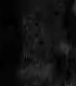

0


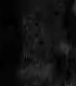

0


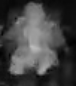

0


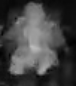

0


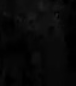

0


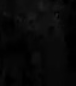

0


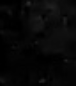

0


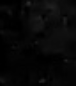

0


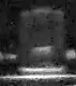

1


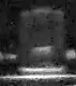

1


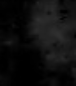

0


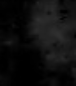

0


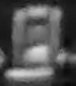

0


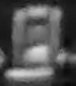

0


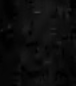

0


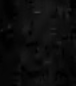

0


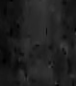

0


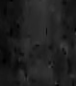

0


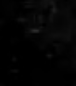

0


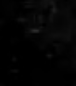

0


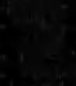

0


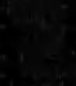

0


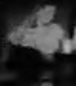

1


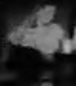

1


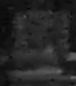

0


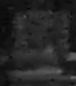

0


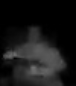

0


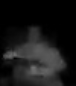

0


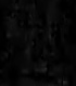

0


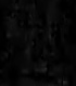

0


In [0]:
from io import BytesIO
import PIL
from IPython.display import display, Image

def display_img_array(ima):
    im = PIL.Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    display(Image(bio.getvalue(), format='png'))

for ind,ima in enumerate(df_x_test):
    display_img_array(ima)
    print(df.values[ind][0])

In [0]:
control = np.load(path_to_your_dir + 'control.npy')

In [0]:
control = control/255

(94,)

In [0]:
from io import BytesIO
import PIL
from IPython.display import display, Image

def display_img_array(ima):
    im = PIL.Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    display(Image(bio.getvalue(), format='png'))

for ind,ima in enumerate(control):
    display_img_array(ima)
    print(df.values[ind][0])

TypeError: ignored